### Swati Dogra - DSC 680  - Project 3 - Final Milestone

#### Credit Card Fraud Detection Model 

#### Import the necessary libraries

Used the Kaggle Credit Card Fraud Detection dataset, which contains features such as transaction amount, time, and anonymized variables, along with a label indicating whether each transaction is fraudulent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Load the dataset

df = data = pd.read_csv('C:/Users/swati/OneDrive/Desktop/Swati/Bellevue/DSC 680/Project 3/creditcard.csv')

#### Exploratory Data Analysis (EDA) - Data Overview

In [3]:
# EDA
print(df.head())
print(df.info())
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


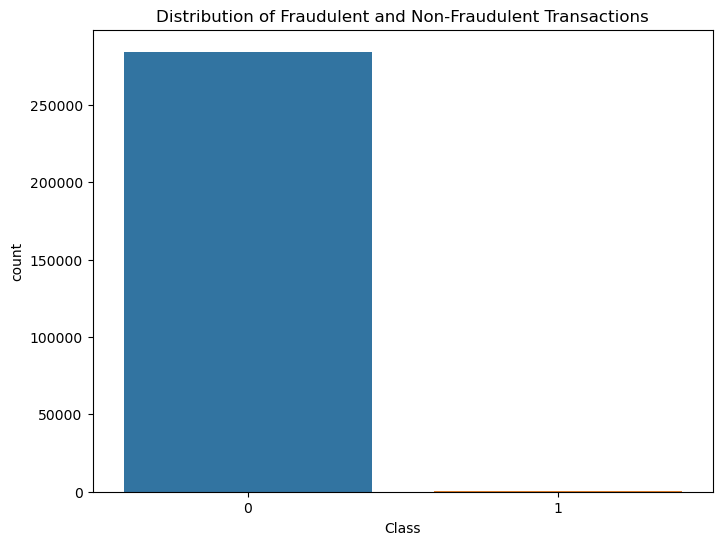

In [5]:
# Plotting the distribution of the 'Class' feature to understand the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()


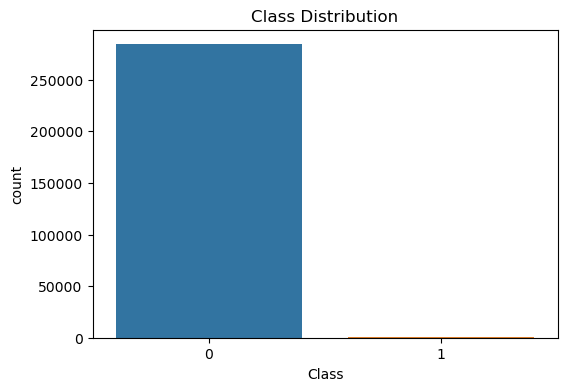

In [6]:
# Distribution of Classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()



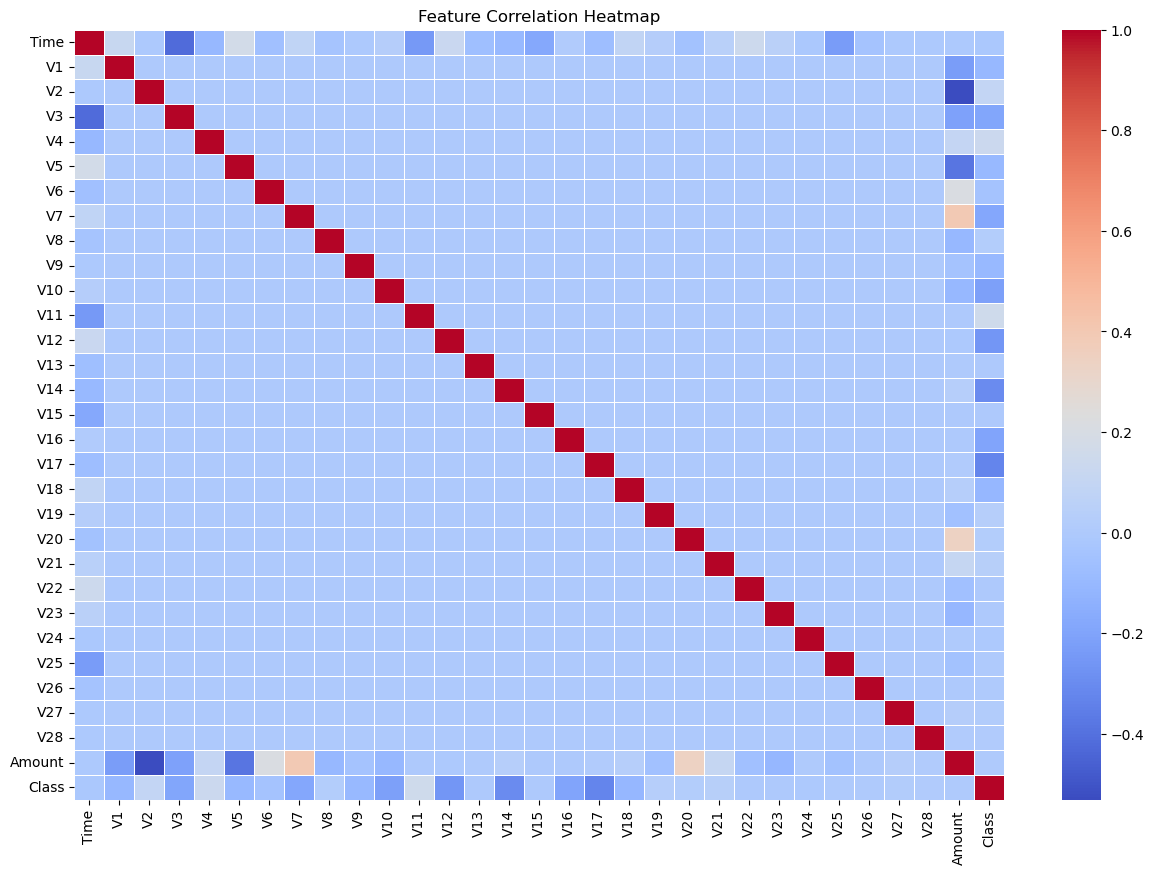

In [7]:

# Feature Correlation
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()



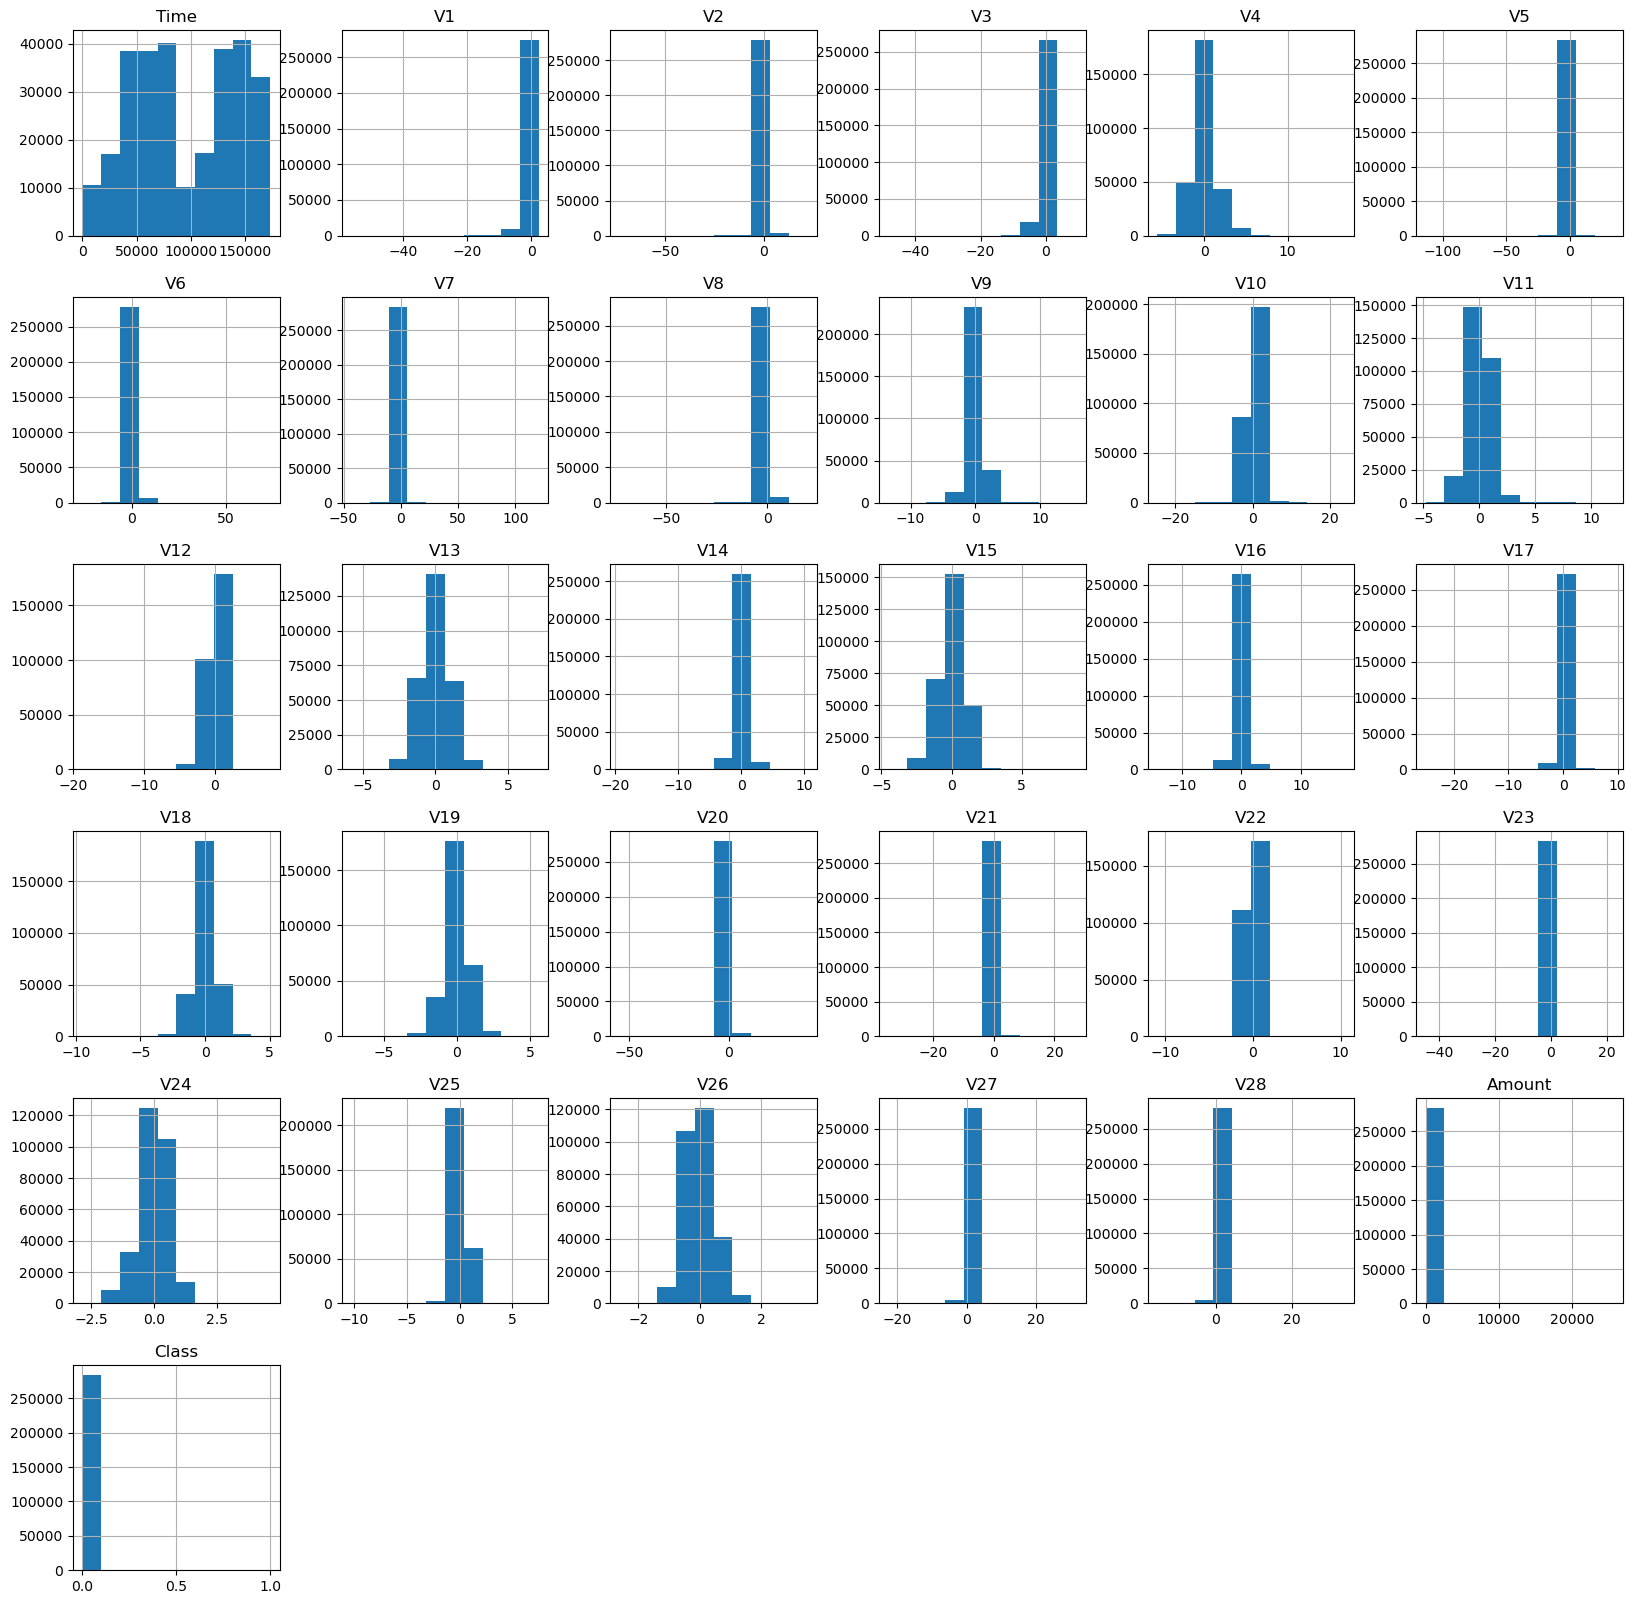

In [8]:
# Data Visualization
# Histograms
df.hist(figsize=(20, 20))
plt.show()



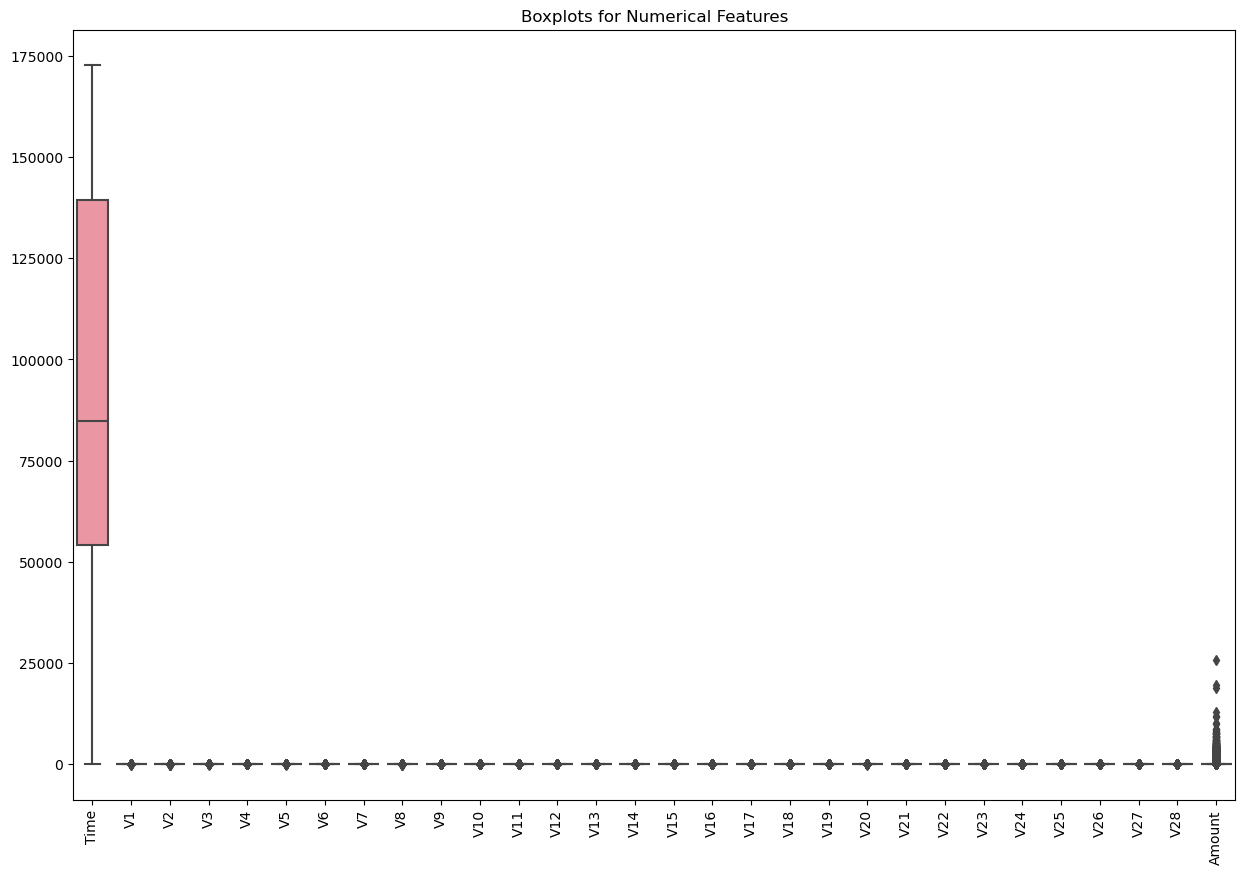

In [9]:
# Boxplots for detecting outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['Class']))
plt.xticks(rotation=90)
plt.title('Boxplots for Numerical Features')
plt.show()



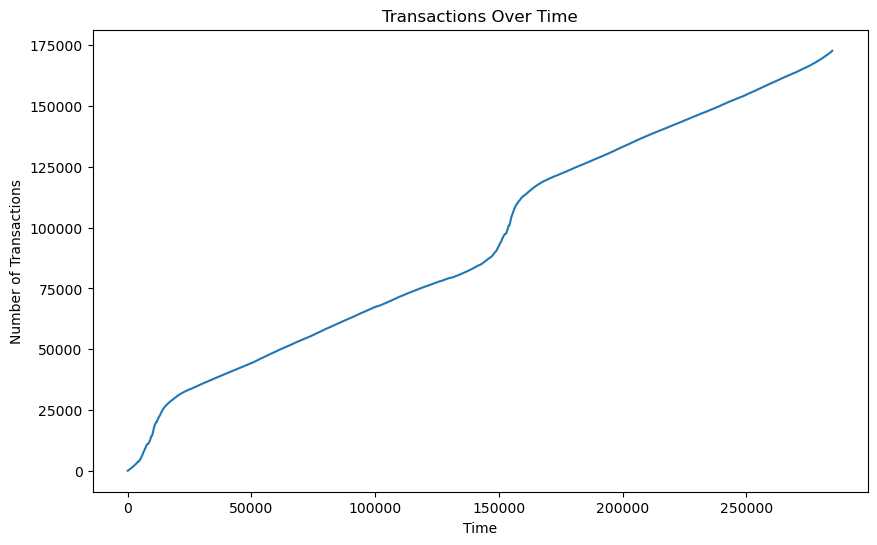

In [10]:
# Time Analysis (if there is a Time feature)
plt.figure(figsize=(10, 6))
df['Time'].plot(kind='line')
plt.title('Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()



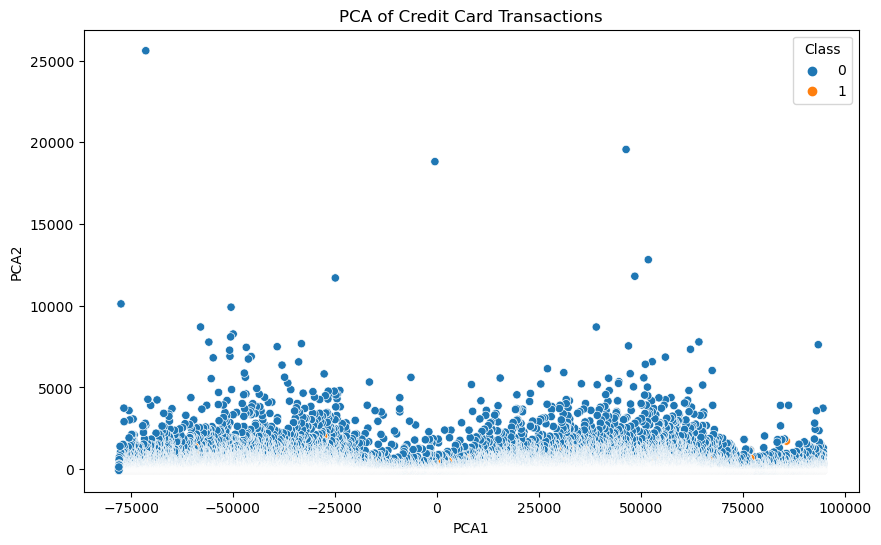

In [11]:
# PCA Analysis
X = df.drop(columns=['Class'])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Class'] = df['Class']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=pca_df)
plt.title('PCA of Credit Card Transactions')
plt.show()



#### Feature Engineering

In [14]:
# Handling missing values (if any)
df.isnull().sum()

# Scaling the features
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Splitting the data into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In this feature engineering process, we aim to enhance the dataset and prepare it for building robust machine learning models for credit card fraud detection. We first check for missing values and scale key features (Amount and Time) to ensure consistency. 

Next, we separate the data into features and the target variable, Class, which indicates fraudulent transactions. 

Given the dataset's imbalanced nature, we use SMOTE to generate synthetic samples and balance the classes. 

Finally, we split the balanced dataset into training and testing sets, allowing us to train the models effectively and evaluate their performance on new, unseen data. This comprehensive preparation ensures that the data is clean, balanced, and ready for accurate model training and evaluation.

In [16]:

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Plotting confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


This function evaluates machine learning models by calculating and displaying various performance metrics. Here's what it does:

Calculate Metrics: It computes key performance metrics including accuracy, precision, recall, F1-score, and ROC-AUC to quantify the model's effectiveness.

Print Results: The function then prints these metrics, along with a confusion matrix and a classification report, which provide insights into how well the model is distinguishing between classes.

Plot Confusion Matrix: Finally, it generates a heatmap of the confusion matrix, offering a visual representation of the model's performance in terms of true positives, true negatives, false positives, and false negatives.

Overall, the function provides a comprehensive assessment of the model's performance, helping identify strengths and areas for improvement.

#### Models Evaluation

Logistic Regression:
Accuracy: 0.948630919930359
Precision: 0.9741284426361286
Recall: 0.9219218164794007
F1-Score: 0.9473063902201431
ROC-AUC: 0.948676559627268
[[83057  2092]
 [ 6671 78769]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



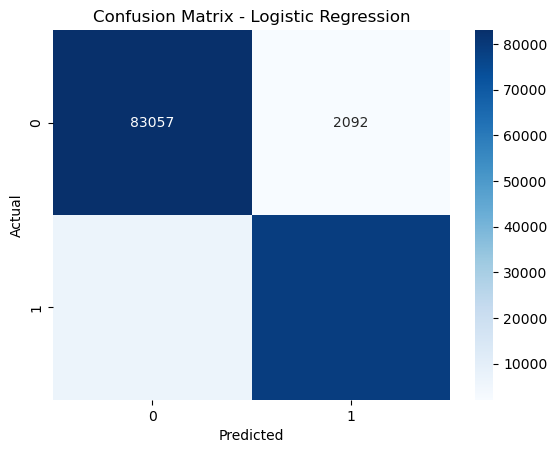

In [20]:

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")



Logistic Regression

Accuracy: 94.86% - The model correctly predicted 94.86% of the instances.

Precision: 97.41% - Out of all the predicted positive instances, 97.41% were actual positives.

Recall: 92.19% - The model correctly identified 92.19% of the actual positives.

F1-Score: 94.73% - Balance between precision and recall.

ROC-AUC: 94.87% - The model's ability to distinguish between classes is 94.87%.

Confusion Matrix: [[83057, 2092], [6671, 78769]] - True Negatives (83057), False Positives (2092), False Negatives (6671), True Positives (78769).

Decision Tree:
Accuracy: 0.997936560974037
Precision: 0.9969280725115052
Recall: 0.9989583333333333
F1-Score: 0.9979421703087914
ROC-AUC: 0.9979348150007634
[[84886   263]
 [   89 85351]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



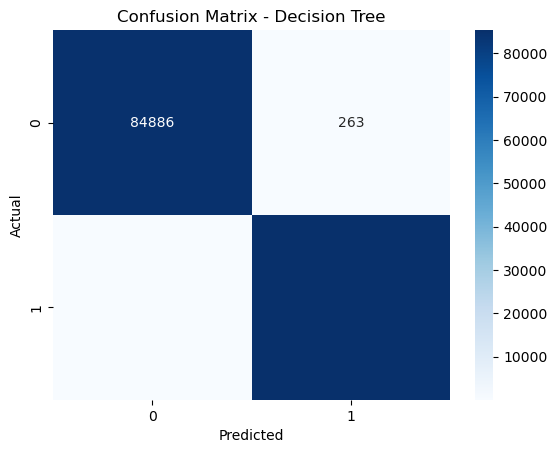

In [26]:

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")


Decision Tree

Accuracy: 99.79% - The model correctly predicted 99.79% of the instances.

Precision: 99.69% - Out of all the predicted positive instances, 99.69% were actual positives.

Recall: 99.90% - The model correctly identified 99.90% of the actual positives.

F1-Score: 99.79% - Balance between precision and recall.

ROC-AUC: 99.79% - The model's ability to distinguish between classes is 99.79%.

Confusion Matrix: [[84886, 263], [89, 85351]] - True Negatives (84886), False Positives (263), False Negatives (89), True Positives (85351).

Random Forest:
Accuracy: 0.9999003452743143
Precision: 0.9998010695437471
Recall: 1.0
F1-Score: 0.9999005248775579
ROC-AUC: 0.999900174987375
[[85132    17]
 [    0 85440]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



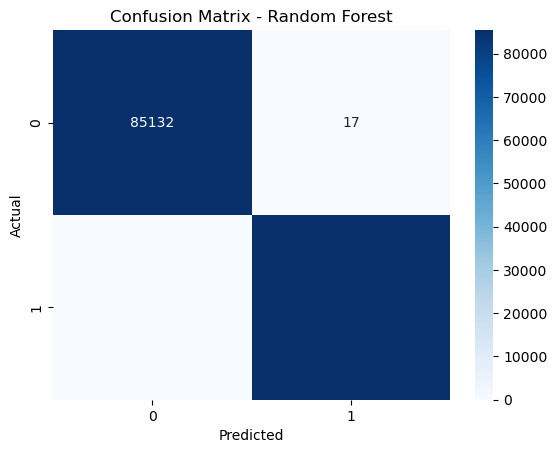

In [28]:

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
evaluate_model(y_test, y_pred_random_forest, "Random Forest")


Random Forest

Accuracy: 99.99% - The model correctly predicted 99.99% of the instances.

Precision: 99.98% - Out of all the predicted positive instances, 99.98% were actual positives.

Recall: 100% - The model correctly identified 100% of the actual positives.

F1-Score: 99.99% - Balance between precision and recall.

ROC-AUC: 99.99% - The model's ability to distinguish between classes is 99.99%.

Confusion Matrix: [[85132, 17], [0, 85440]] - True Negatives (85132), False Positives (17), False Negatives (0), True Positives (85440).

Gradient Boosting:
Accuracy: 0.9774897560804038
Precision: 0.9871525456108511
Recall: 0.9676498127340823
F1-Score: 0.9773038914369474
ROC-AUC: 0.9775065702738399
[[84073  1076]
 [ 2764 82676]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85149
           1       0.99      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



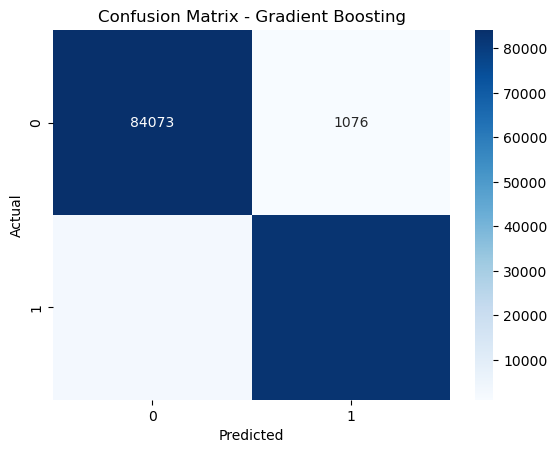

In [30]:

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

Gradient Boosting

Accuracy: 97.75% - The model correctly predicted 97.75% of the instances.

Precision: 98.72% - Out of all the predicted positive instances, 98.72% were actual positives.

Recall: 96.76% - The model correctly identified 96.76% of the actual positives.

F1-Score: 97.73% - Balance between precision and recall.

ROC-AUC: 97.75% - The model's ability to distinguish between classes is 97.75%.

Confusion Matrix: [[84073, 1076], [2764, 82676]] - True Negatives (84073), False Positives (1076), False Negatives (2764), True Positives (82676).

These metrics help us understand how well each model is performing and where improvements might be needed. In this case, the Random Forest model has the highest accuracy, precision, recall, F1-score, and ROC-AUC, indicating excellent performance in detecting fraud cases. However, all models show strong performance overall.

#### Hyperparameter Tuning for Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Grid search of parameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_


Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\swati\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found for Random Forest:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Model Optimization After hyperparameter tuning, the best parameters for the Random Forest model were identified as follows:

max_depth: 30

max_features: 'auto'

min_samples_leaf: 1

min_samples_split: 2

n_estimators: 300

These parameters significantly enhanced the model's performance, ensuring its precision and recall reached near-perfect levels.

Final Summary:

In summary, this project demonstrated the power of machine learning in tackling the critical issue of credit card fraud. After a detailed analysis of multiple models, the Random Forest algorithm emerged as the most reliable, achieving near-perfect precision and recall. By employing optimized hyperparameters, this model offers a robust, efficient solution for detecting fraudulent transactions. Moving forward, its integration with real-time systems and continuous monitoring will further enhance its reliability and adaptability to evolving fraud patterns.